Brainwave EEG data analysis

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import scipy as sp
from scipy import signal
from scipy.signal import stft
import pywt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pyedflib
import mne

archive (3)

Extracting GDF parameters from archive (3)/BCICIV_2a_gdf/A01E.gdf...
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


C:\Users\Junsu Choi\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-19 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: A01, sex: 0, last_name: X, birthday: 1983-01-19>
>


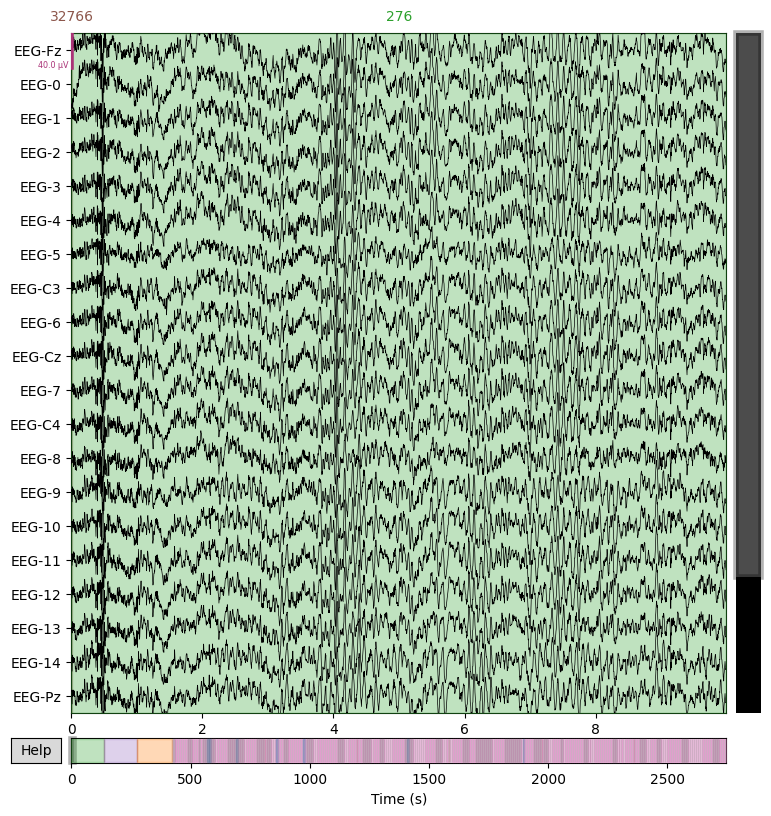

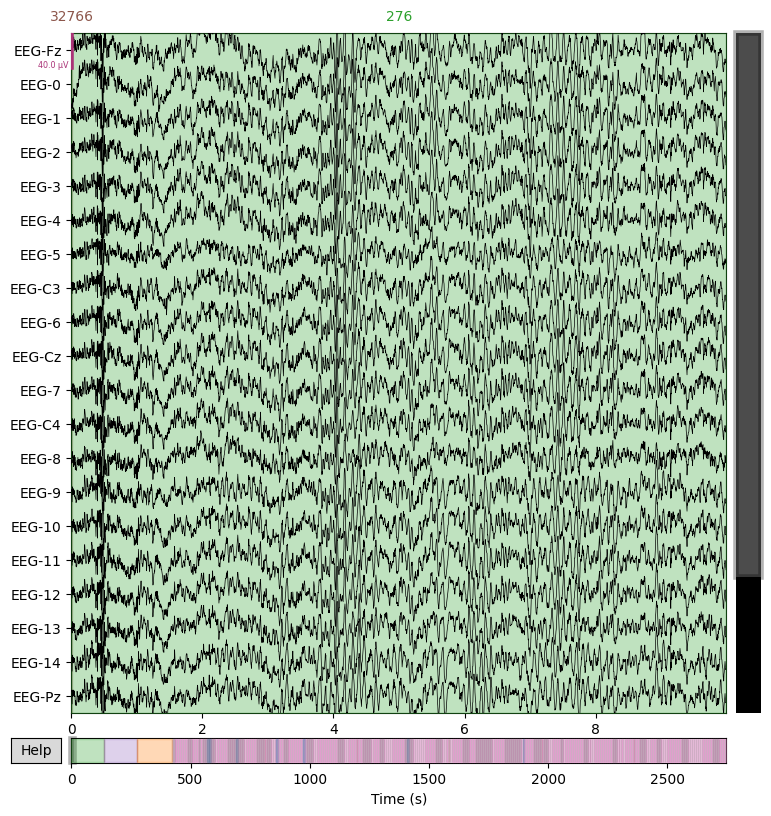

In [3]:
raw = mne.io.read_raw_gdf("archive (3)/BCICIV_2a_gdf/A01E.gdf", preload=True)
print(raw.info)
raw.plot()  # EEG 시각화


archive (1)

Creating RawArray with float64 data, n_channels=112, n_times=2880
    Range : 0 ... 2879 =      0.000 ...    22.492 secs
Ready.


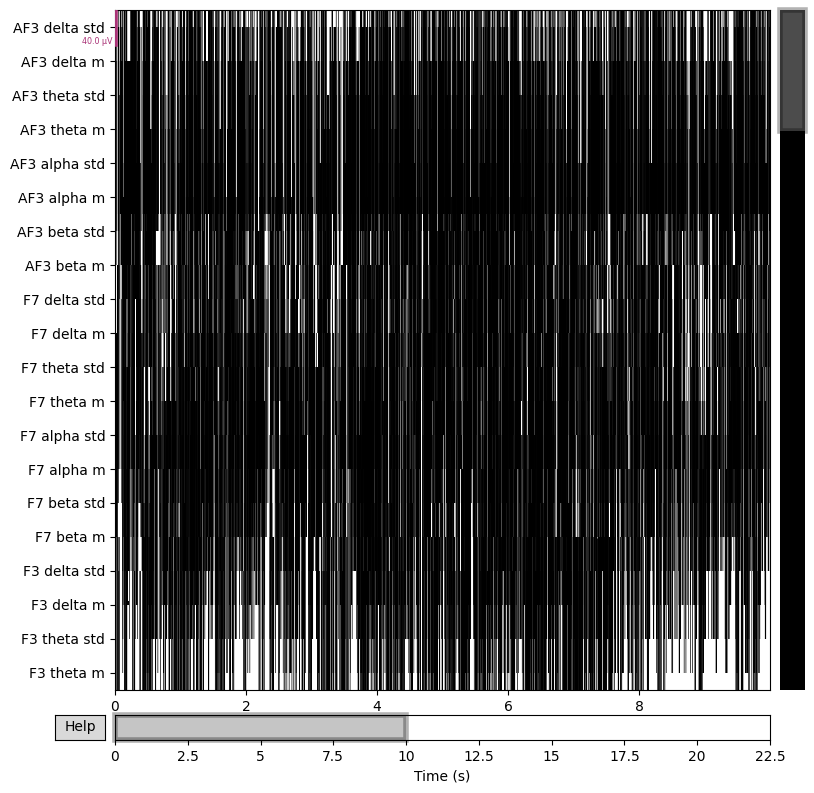

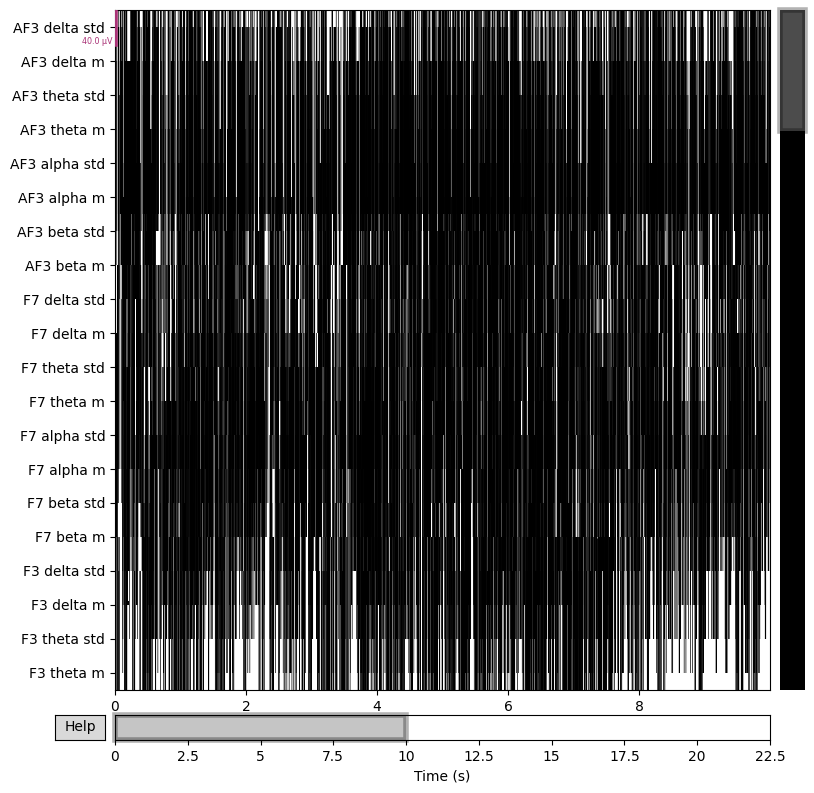

In [5]:
# CSV 불러오기 (가정: 첫 번째 열은 시간, 나머지는 채널 데이터)
df = pd.read_csv("archive (1)/Dataset/user_a.csv")

# 채널 데이터만 추출
data = df.iloc[:, 1:].to_numpy().T   # (n_channels, n_samples)

# 샘플링 레이트 지정 (예: 250Hz)
sfreq = 128  

# 채널 이름 지정
ch_names = df.columns[1:].tolist()
ch_types = ["eeg"] * len(ch_names)

# MNE RawArray 객체 생성
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data, info)

# 시각화
raw.plot()

archive (1)

In [ ]:
raw = mne.io.read_raw_edf("archive (5)/files/S001/S001R01.edf", preload=True)
print(raw.info)
raw.plot()  # EEG 시각화

NotImplementedError: Only EDF files are supported, got event.